### ANALYZE PSEI PRICE PERFORMANCE USING SENTIMENTAL AND NUMERICAL ANALYSIS, AND FORECAST PRICE USING MACHINE LEARNING (PART 2)

##### Forecasting using Prophet Model

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [2]:
#Import dataset
df_price = pd.read_csv('C:/Users/Jan/Desktop/JAN/GRIP-INTERNSHIP/PSEI-Analysis/PSEI(2014-2023).csv')
#Transform dataset
df_price['Date'] = pd.to_datetime(df_price['Date'])
df_price = df_price.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
df_price = df_price.dropna().set_index('Date').sort_values(by='Date')
display(df_price)

,Close
Date,
2014-01-02,5984.259766
2014-01-03,5947.930176
2014-01-06,5985.810059
2014-01-07,5947.439941
2014-01-08,5986.479980
...,...
2023-05-08,6600.740234
2023-05-09,6622.609863
2023-05-10,6658.589844


### Forcasting using prophet model

In [3]:
# Feature engineering
df_prophet = df_price.reset_index()
df_prophet.columns = ['ds', 'y']

# Train model
model_Prophet = Prophet(daily_seasonality=True, interval_width=0.8)
model_Prophet.fit(df_prophet)

05:39:00 - cmdstanpy - INFO - Chain [1] start processing
05:39:02 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
0,2014-01-02,6005.063694,5683.160905,6358.846514
1,2014-01-03,6019.358572,5675.645897,6366.846218
2,2014-01-06,6069.289652,5711.998686,6397.245077
3,2014-01-07,6085.558766,5747.005387,6452.769554
4,2014-01-08,6106.765813,5770.558576,6450.210296
...,...,...,...,...
2535,2024-05-06,6109.648197,4293.007053,8048.420111
2536,2024-05-07,6103.244658,4272.730464,8142.455785
2537,2024-05-08,6102.751541,4092.098896,8120.433684
2538,2024-05-09,6098.995707,4189.194896,8029.575645


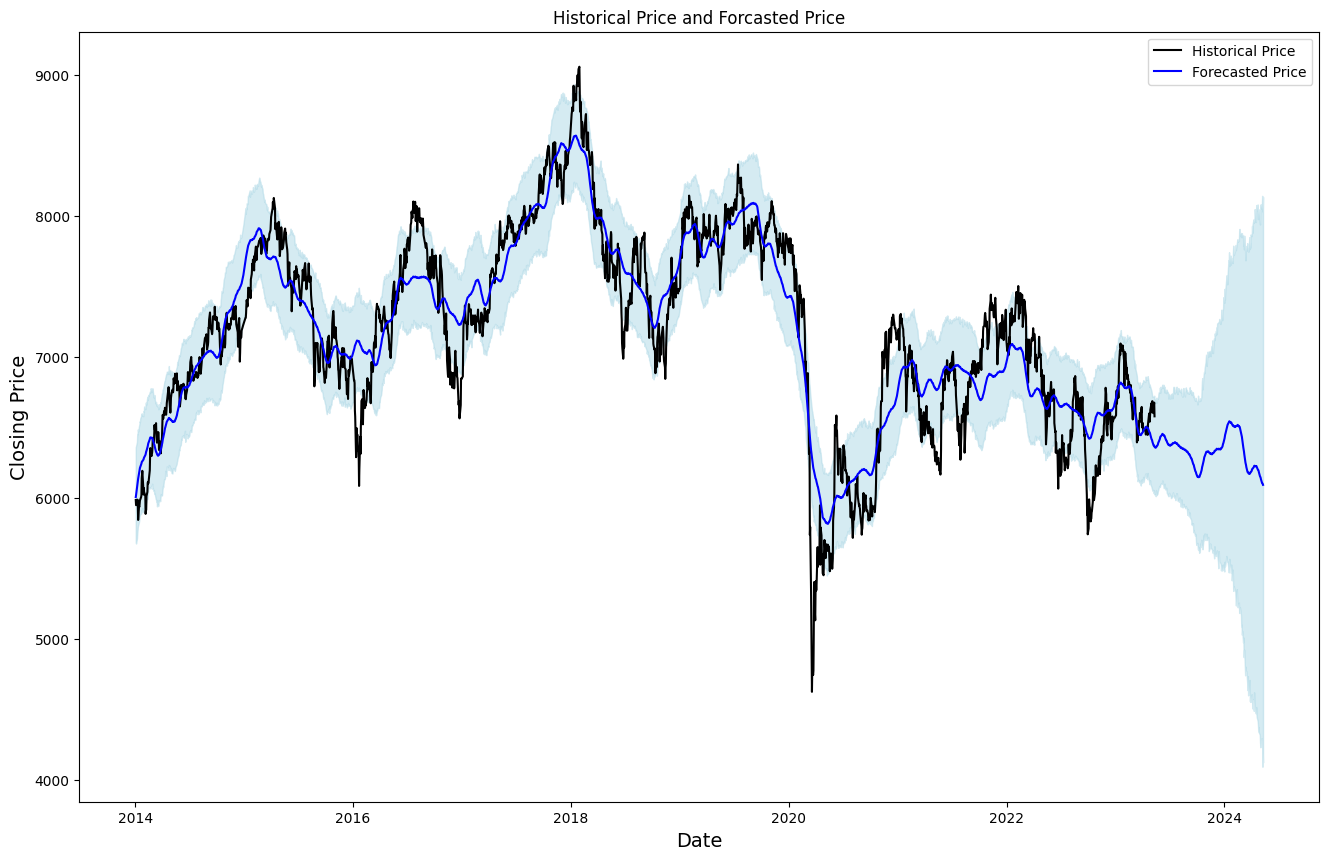

In [4]:
future_dates = model_Prophet.make_future_dataframe(periods=365)
future_dates = future_dates[future_dates['ds'].dt.weekday < 5]
prophet_forecast  = model_Prophet.predict(future_dates)
display(prophet_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

plt.figure(figsize=(16, 10))
plt.plot(df_price.index, df_price['Close'], color='black', label='Historical Price')
plt.plot(prophet_forecast['ds'], prophet_forecast['yhat'], color='blue', label='Forecasted Price')
plt.fill_between(prophet_forecast['ds'], prophet_forecast['yhat_lower'], prophet_forecast['yhat_upper'], color='lightblue', alpha=0.5)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)
plt.legend()
plt.title('Historical Price and Forcasted Price')
plt.show() 

In [5]:
df_forecast_prophet = pd.DataFrame()
df_forecast_prophet['Date'] = prophet_forecast['ds']
df_forecast_prophet['yhat'] = prophet_forecast['yhat']
df_forecast_prophet['yhat_lower'] = prophet_forecast['yhat_lower']
df_forecast_prophet['yhat_upper'] = prophet_forecast['yhat_upper']
display(df_forecast_prophet)

,Date,yhat,yhat_lower,yhat_upper
0,2014-01-02,6005.063694,5683.160905,6358.846514
1,2014-01-03,6019.358572,5675.645897,6366.846218
2,2014-01-06,6069.289652,5711.998686,6397.245077
3,2014-01-07,6085.558766,5747.005387,6452.769554
4,2014-01-08,6106.765813,5770.558576,6450.210296
...,...,...,...,...
2535,2024-05-06,6109.648197,4293.007053,8048.420111
2536,2024-05-07,6103.244658,4272.730464,8142.455785
2537,2024-05-08,6102.751541,4092.098896,8120.433684
2538,2024-05-09,6098.995707,4189.194896,8029.575645


In [6]:
# df_forecast_prophet.to_excel('df_forecast_prophet.xlsx', index=False)